# Surprises of high dimensions

This Jupyter notebook is devoted to exploring some of high-dimensional phenomena presented in the lectures. These phenomena often challenge our intuitions, and in this notebook, we will have a look at them once more by analyzing it empirically using random sampling.

## Near orthogonality

In the lectures, you discovered that most of the volume of the unit-radius high-dimensional ball is concentrated near its "equator." Specifically, for any unit-length vector defining the "north" direction, most of the volume of the unit ball lies in the thin slab around the "equator" of size $O\Bigl(\frac{1}{\sqrt d}\Bigr)$, where $d$ is the dimension of the ball.

One implication of this fact is that any two random points, drawn uniformly on the sphere, are nearly orthogonal with high probability. We will investigate this phenomenon empirically.

In [1]:
import numpy as np
import scipy
from scipy.spatial.distance import cdist
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

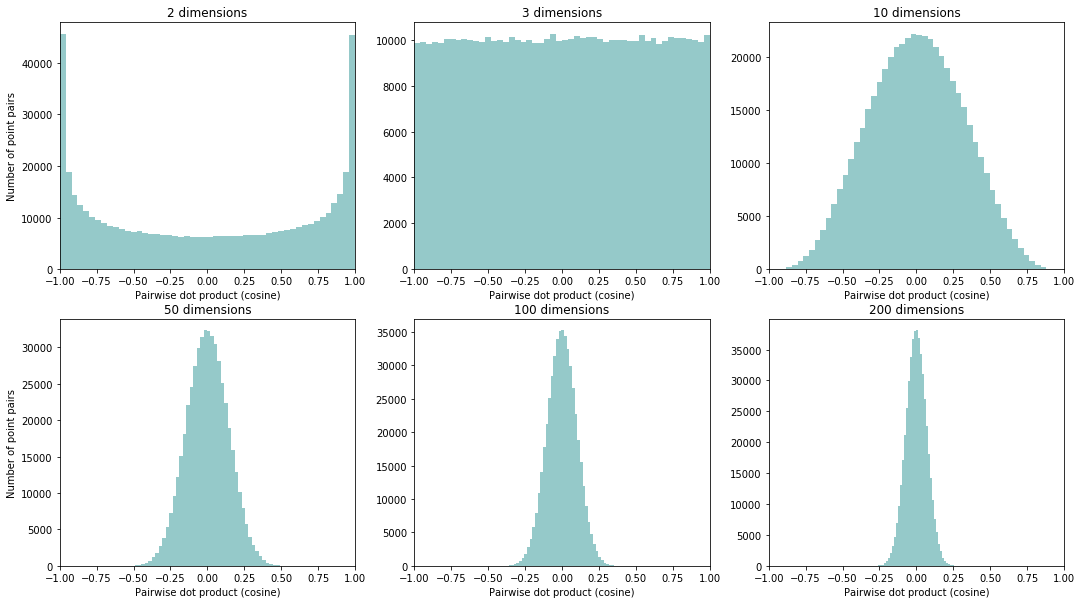

In [2]:
dims = [2, 3, 10, 50, 100, 200]  # feel free to experiment and change dimensions values!
N = 1000  # try to increase number of samples as well

fig, axs = plt.subplots(nrows=2, ncols=len(dims) // 2, figsize=(3 * len(dims), 10))
axs[0, 0].set_ylabel("Number of point pairs")
axs[1, 0].set_ylabel("Number of point pairs")

idx = np.triu_indices(N, 1)  # indices for the upper-triangle of an (N, N) array

for ax, dim in zip(fig.axes, dims):
    points = np.random.randn(N, dim)
    points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
    pairwise_dot_product = 1 - cdist(points, points, 'cosine')  # cosine distance which is defined as the complement of cosine similarity
    ax.hist(pairwise_dot_product[idx], bins=50, color="#69b3b2", alpha=0.7)             
    ax.set_xlabel("Pairwise dot product (cosine)")
    ax.set_xlim(-1,1)
    ax.set_title(f'{dim} dimensions')

For generating points we used standard normal distribution and then normalized points to have norm 1 (can you explain why it yields points that are uniformly distributed on the unit-sphere?). 

We can see that as dimension grows, the more concentrated pairwise dot product is around zero. 
Here, we keep the number of points constant while increasing the dimension. Clearly, if we keep the dimension constant and take infinitely many points, the property of near orthogonality will cease to hold. One might wonder when does this phase transition in terms of scale of $n$ compared to $d$ happens. 

It's essential to note that while there are at most $d$ exactly orthogonal vectors in $d$ dimensions, the number of vectors that are nearly orthogonal can be substantially larger. Can you guess how many near-orthogonal vectors exist in high dimensions (up to a constant factor)? This question is non-trivial and will become more clear as we will learn more theory on dimension reduction later in the course. 

## Random points are nearly equidistant 

Now, we consider the following observation: since most vectors drawn uniformly at random on the high-dimensional sphere are nearly orthogonal, they are also nearly equidistant with high probability.

Before running the next cell, can you guess what is the average pairwise distance between two points generated uniformly on the sphere?

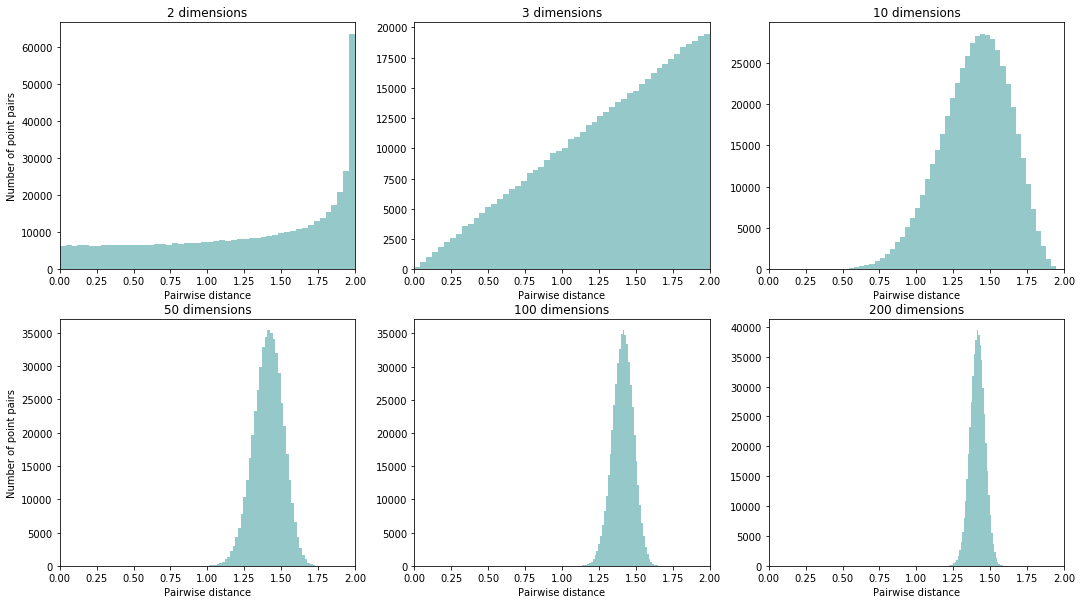

In [3]:
dims = [2, 3, 10, 50, 100, 200]  # feel free to experiment and change dimensions values!
N = 1000  # try to increase number of samples as well

fig, axs = plt.subplots(nrows=2, ncols=len(dims) // 2, figsize=(3 * len(dims), 10))
axs[0, 0].set_ylabel("Number of point pairs")
axs[1, 0].set_ylabel("Number of point pairs")

idx = np.triu_indices(N, 1)  # indices for the upper-triangle of an (N, N) array

for ax, dim in zip(fig.axes, dims):
    points = np.random.randn(N, dim)
    points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
    pairwise_distance = cdist(points, points, 'euclidean') 
    ax.hist(pairwise_distance[idx], bins=50, color="#69b3b2", alpha=0.7)             
    ax.set_xlabel("Pairwise distance")
    ax.set_xlim(0, 2.0)
    ax.set_title(f'{dim} dimensions')

Looking at these plots, think what other experiments would you be interested to perform? For example, one possible question is how tight is the concentration around the $\sqrt{2}$ depending on dimension $d$. How would you formulate (mathematically) and design (practically) such an experiment? What other things can be checked empirically? Feel free to try different things yourself!

## Volume of the unit ball is near the equator and annulus

The goal of the last experiment is to analyze the behaviour of the points drawn uniformly at random in the high-dimensional unit-ball (as opposed to a sphere in the previous experiments). More specifically, we want to use probability to check that the most of the volume of the ball lies in the thin annulus. 

Read carefully the procedure of generating the points uniformly in the $d$-dimensional ball. Can you prove that this procedure yields uniform distribution in the ball? 

You can read the code in the cell below or the mathematical formulation of this procedure.
Let 
$$
S_1, \dots, S_n \overset{\text{iid}}{\sim} N(0, I_d)
$$
and
$$
U_1, \dots, U_n \overset{\text{iid}}{\sim} \operatorname{Unif}(0,1)
$$
Then points 
$$
P_i = \frac{S_i}{\|S_i\|} U_i^{1/d}, \quad i = 1, \dots, n
$$
are uniformly distributed in $B^d$.

Text(0.5, 1.0, 'Points sampled from uniform distribution\n in 2-dimensional ball')

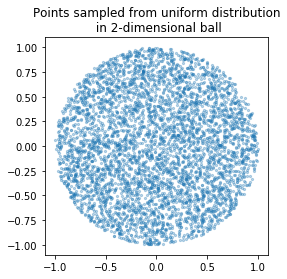

In [4]:
def generate_uniform_in_ball(n, d):
    samples = np.random.randn(n, d)
    magnitude = np.random.rand(n) ** (1. / d)
    points = samples * magnitude[:, np.newaxis] / np.linalg.norm(samples, axis=1)[:, np.newaxis]
    return points


# let us quickly check this procedure for d=2

points = generate_uniform_in_ball(5000, 2)
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(points[:, 0], points[:, 1], s=5, alpha=0.3)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.title('Points sampled from uniform distribution\n in 2-dimensional ball')

Now we are ready to generate points and plot their norms.

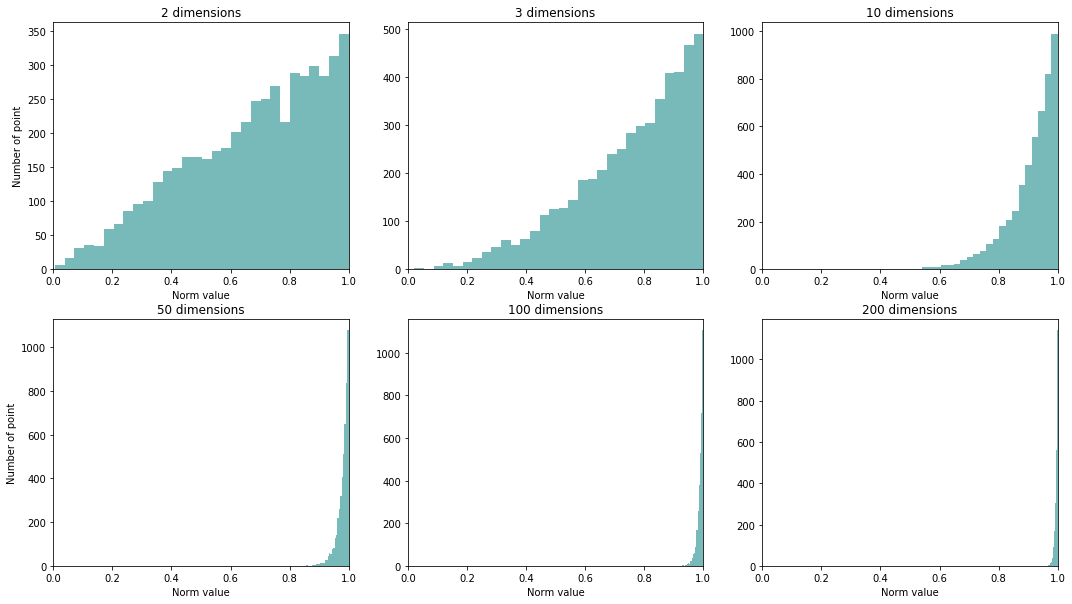

In [5]:
dims = [2, 3, 10, 50, 100, 200]  # feel free to experiment and change dimensions values!
N = 5000  # try to increase number of samples as well

fig, axs = plt.subplots(nrows=2, ncols=len(dims) // 2, figsize=(3 * len(dims), 10))
axs[0, 0].set_ylabel("Number of point")
axs[1, 0].set_ylabel("Number of point")

idx = np.triu_indices(N, 1)  # indices for the upper-triangle of an (N, N) array

for ax, dim in zip(fig.axes, dims):
    points = generate_uniform_in_ball(N, dim)
    points_norms = np.linalg.norm(points, axis=1)
    ax.hist(points_norms, bins=30, color="#69b3b2", alpha=0.9)             
    ax.set_xlabel("Norm value")
    ax.set_xlim(0, 1.0) 

    ax.set_title(f'{dim} dimensions')

We set the same limits for x-axis for better understanding of the scale, but in high dimensions norms are tigthly concentrated around 1, so let us plot the norms for $d=1000$ once again without a limit on x axis. 

Text(0.5, 1.0, '1000 dimensions')

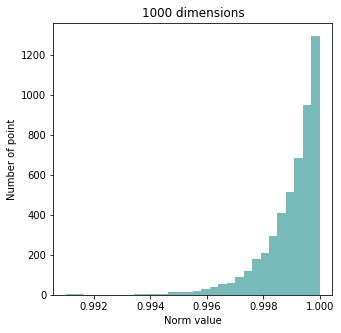

In [6]:
dim = 1000
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylabel("Number of point")
points = generate_uniform_in_ball(N, dim)
points_norms = np.linalg.norm(points, axis=1)
ax.hist(points_norms, bins=30, color="#69b3b2", alpha=0.9)             
ax.set_xlabel("Norm value")
ax.set_title(f'{dim} dimensions')

In the homework sheet 1, exercise 1, you will show that with probability $1 - O(1/n)$ all $n$ points will lie in the annulus of width $\frac{2 \ln(n)}{d}$. Let's check if this holds for $d = 1000$ with the points generated in the last cell. 

In [7]:
w = 2 * np.log(N) / dim
print(f"There are {np.sum(points_norms > 1 - w)} out of {N} points lying in the annulus of width {w:.3f}")

There are 5000 out of 5000 points lying in the annulus of width 0.017


Now we check that for any fixed point which we choose as a northpole, the random points fall in a slab around the "equator" of size $O \Bigl( \frac{1}{\sqrt{d}}\Bigr)$ with high probability. For this, we randomly generate 15 different northpoles and compute how many points are close to the respective equators.

In [8]:
num_points = 500
dim = 50
ball_points = generate_uniform_in_ball(num_points, d=dim)

# Randomly generate fifteen additional points (assuming they are at the North Pole)
n_additional_points = 15
additional_points = np.random.randn(n_additional_points, dim) 
additional_points /= np.linalg.norm(additional_points, axis=1)[:, np.newaxis]


band_width = 2 / np.sqrt(50)

# Initialize lists to store the count of points in each slab
points_in_slabs = [0] * n_additional_points
points_in_all_slabs = 0


# Determine how many points are in each band
for ball_point in ball_points:
    point_in_all_slabs = 1
    for i, point in enumerate(additional_points):
        # Calculate the distance from the North Pole (additional point)
        distance = np.abs(np.dot(point, ball_point)) #np.linalg.norm(point - ball_point)
        if distance <= band_width:
            points_in_slabs[i] += 1
        else:
            point_in_all_slabs = 0 
    points_in_all_slabs += point_in_all_slabs

# Find out how many points are in all five bands
#points_in_all_slabs = sum(1 for count in points_in_slabs if count == num_points)

# Calculate the band width required for all points to be in all five bands
required_band_width = max(np.abs(np.dot(point, ball_point)) for point in additional_points for ball_point in ball_points)

print(f"Band width: {band_width}")
print(f"Points in each band: {points_in_slabs}")
print(f"Points in all fifteen bands: {points_in_all_slabs}")
print(f"Required band width for all points to be in all five bands: {required_band_width:.4f}")

Band width: 0.282842712474619
Points in each band: [483, 484, 479, 476, 478, 479, 483, 482, 482, 480, 482, 482, 476, 481, 486]
Points in all fifteen bands: 276
Required band width for all points to be in all five bands: 0.5039


Think how is it possible that almost all the points fall into a thin slice near the "equator" although the "equator" is defined each time differently by randomly selected location for the North Pole? How can the points be simultaneously in a narrow slice around the equator and also be concentrated in a narrow annulus at the surface of the ball? 